# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [6]:
data=pd.read_csv('Employee_Salary.csv',delimiter=',')

In [7]:
data.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [8]:
data.tail()

,Years of Experience,Salary
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [9]:
data.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.3 KB


# Data Visulaisation

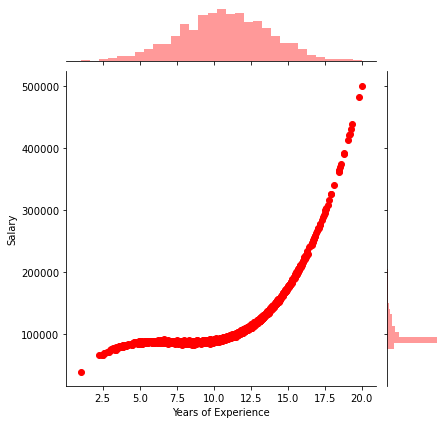

In [13]:
sns.jointplot(x='Years of Experience',y='Salary',data=data,color='r')# It is clear that Linear model won't fit here

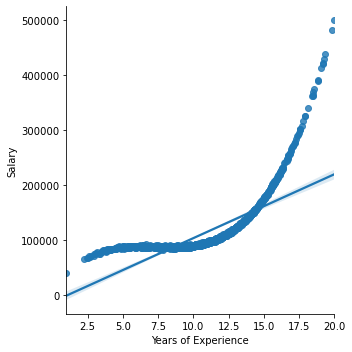

In [15]:
sns.lmplot(x='Years of Experience',y='Salary',data=data)

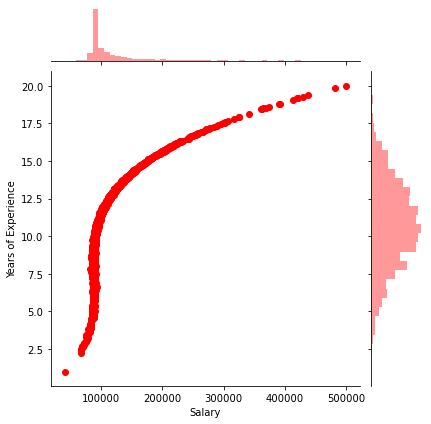

In [16]:
sns.jointplot(x='Salary',y='Years of Experience',data=data,color='r')

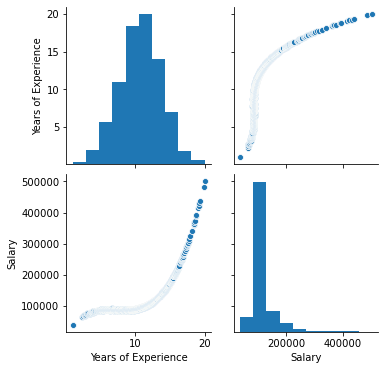

In [17]:
sns.pairplot(data)

# Creating training and Testing Model

In [18]:
x=data[['Years of Experience']]
y=data[['Salary']]

In [19]:
x.shape

(2000, 1)

In [20]:
y.shape

(2000, 1)

In [21]:
x_train=x
y_train=y

# Model Training


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.linear_model import LinearRegression

In [29]:
regressor=LinearRegression(fit_intercept=True)

In [30]:
regressor.fit(x_train,y_train )

LinearRegression()

In [31]:
y_pred=regressor.predict(x_train)

Text(0.5, 1.0, 'salary/years')

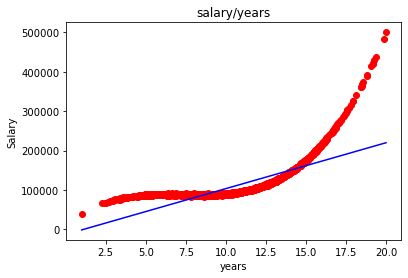

In [34]:
plt.scatter(x_train,y_train,color='r')
plt.plot(x_train,y_pred,color='b')
plt.xlabel('years')
plt.ylabel('Salary')
plt.title('salary/years')

# Polynomial Model

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [61]:
poly_regressor=PolynomialFeatures(degree=3)

In [62]:
x_columns=poly_regressor.fit_transform(x_train)

In [63]:
x_columns

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.25794198e+00, 5.09830199e+00, 1.15116701e+01],
       [1.00000000e+00, 2.45087546e+00, 6.00679053e+00, 1.47218955e+01],
       ...,
       [1.00000000e+00, 1.93533688e+01, 3.74552884e+02, 7.24886009e+03],
       [1.00000000e+00, 1.98425197e+01, 3.93725587e+02, 7.81250771e+03],
       [1.00000000e+00, 2.00000000e+01, 4.00000000e+02, 8.00000000e+03]])

In [64]:
regressor=LinearRegression()

In [65]:
regressor.fit(x_columns,y_train)

LinearRegression()

In [66]:
print(regressor.coef_)

[[    0.         32261.2432746  -4503.00578987   205.20736238]]


# Predicting

In [67]:
y_pred=regressor.predict(x_columns)

Text(0.5, 1.0, 'Salary vs Years (poly order=3)')

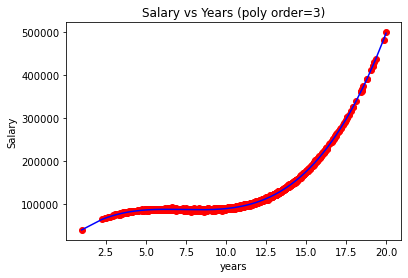

In [71]:
plt.scatter(x_train,y_train,color='r')
plt.plot(x_train,y_pred,color='b') # for degree=3 the predicted value completely fits the output
plt.xlabel('years')
plt.ylabel('Salary')
plt.title('Salary vs Years (poly order=3)')